### Intro
This dataset contains google playstore dataset involving attributes such as review, rating, size, installs, type and etc. This time I will practice for simple exploratory data analysis.

For more details on dataset, please visit <a href='https://www.kaggle.com/lava18/google-play-store-apps'>here</a>

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

### Load Data

In [2]:
df = pd.read_csv('C:/Users/jabchoi/Documents/data_set/Google_PlayStore_Dataset/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
print('Rows: {0}, Columns: {1}'.format(df.shape[0], df.shape[1]))

Rows: 10841, Columns: 13


### Missing value

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
df.dropna(how='any', inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [6]:
# Let's see the number of rows and cols after dropping null value
print('Rows: {0}, Columns: {1}'.format(df.shape[0], df.shape[1]))

Rows: 9360, Columns: 13


Dropped __1,481 rows__ having a NULL value

### Rating Distribution

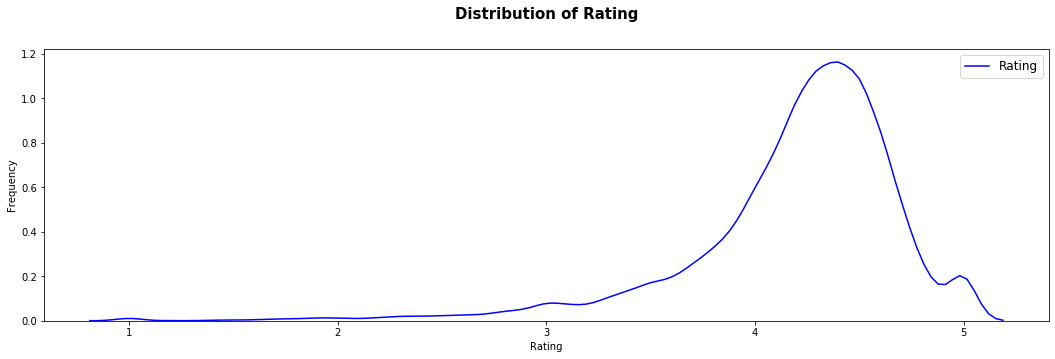

In [7]:
rcParams['figure.figsize'] = 18, 5

ax = sns.kdeplot(df.Rating, color='Blue')

ax.set_title('Distribution of Rating', fontsize=15, fontweight='bold', pad=30)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.legend(fontsize=12)

__Result__: Average of rating of apps is approximately 4.2

### Categories

In [8]:
# How many categories?
print("The number of categories: {}".format(len(df.Category.unique())))

The number of categories: 33


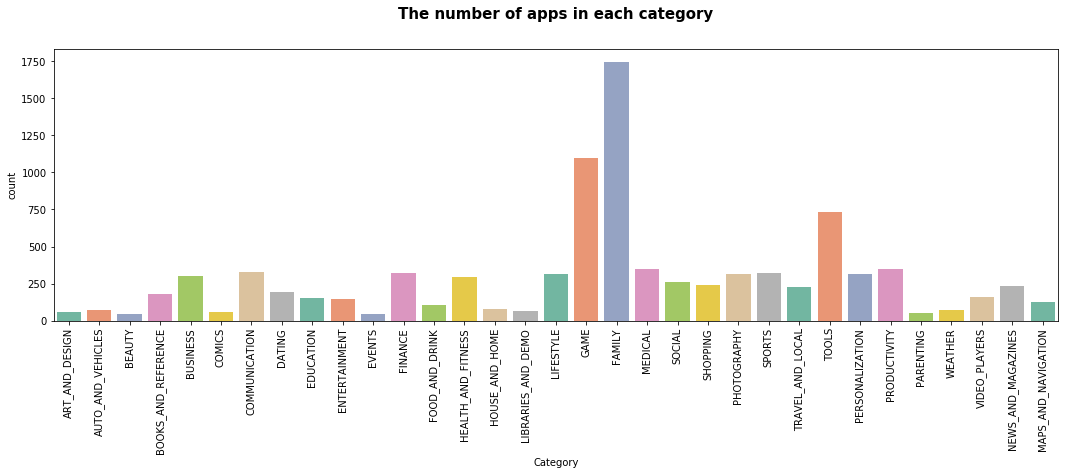

In [9]:
plt.figure(figsize=(18,5))

ax = sns.countplot(x='Category', data=df, palette='Set2')

ax.set_title('The number of apps in each category', fontsize=15, fontweight='bold', pad=30)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

__Result__: FAMILY category is the most appearances for application in google play store

### Rating for each category

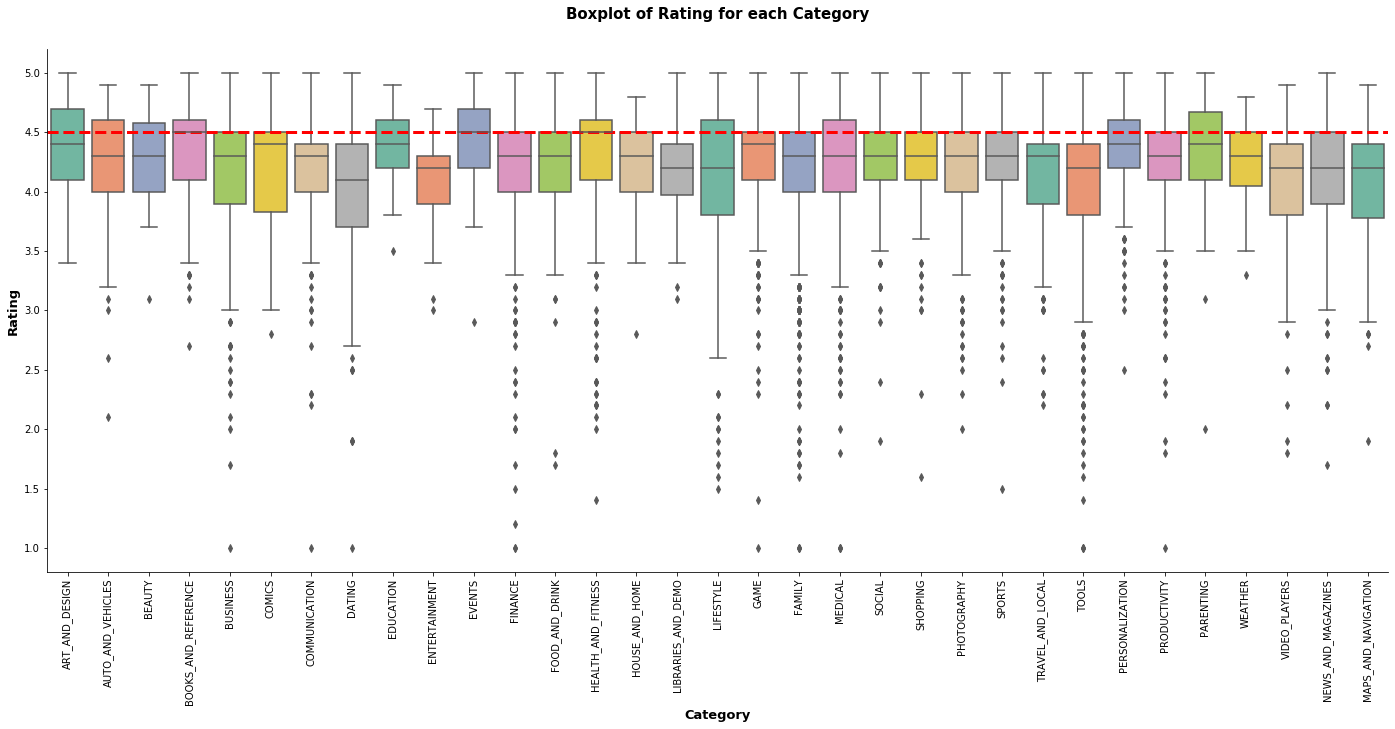

In [10]:
# Use .catplot()
# This function provides access to several axes-level functions that show the relationship 
#between a numerical and one or more categorical variables using one of several visual representations

ax = sns.catplot(x='Category', y='Rating', data=df, kind='box', height=8, palette='Set2', aspect=2.5)
ax.set_xticklabels(rotation=90)
ax.set_xlabels('Category', fontsize=13, fontweight='bold')
ax.set_ylabels('Rating', fontsize=13, fontweight='bold')

plt.title('Boxplot of Rating for each Category', fontsize=15, fontweight='bold', pad=30)
plt.axhline(4.5, color='red', linestyle='--', linewidth=3)       # Horizontal lines on rating 4.5

plt.show()

__Results__: __'Books and reference'__, __'Events'__, and __'Health and fitness'__ are the category that has the highest rating in google play store.

### Relationship between Rating and Reviews

In [11]:
# Is the datatype of Review Int?
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [12]:
# The datatype is still object. Let's convert it to Int
df['Reviews'] = df['Reviews'].astype(int)
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32

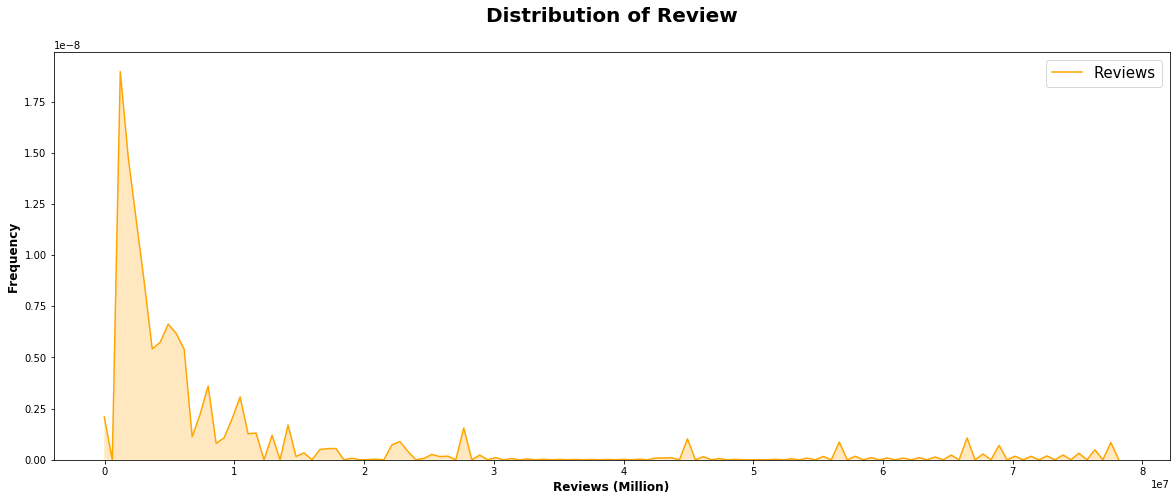

In [13]:
# First, let's see how distibution of Rating looks like
plt.figure(figsize=(20, 7.5))

ax = sns.kdeplot(df.Reviews, color='orange', shade=True)

ax.set_title('Distribution of Review', fontsize=20, fontweight='bold', pad=30)
ax.set_xlabel('Reviews (Million)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.legend(fontsize=15)

plt.show()

__Result__: Most of apps have actually __less than 1M reviews__

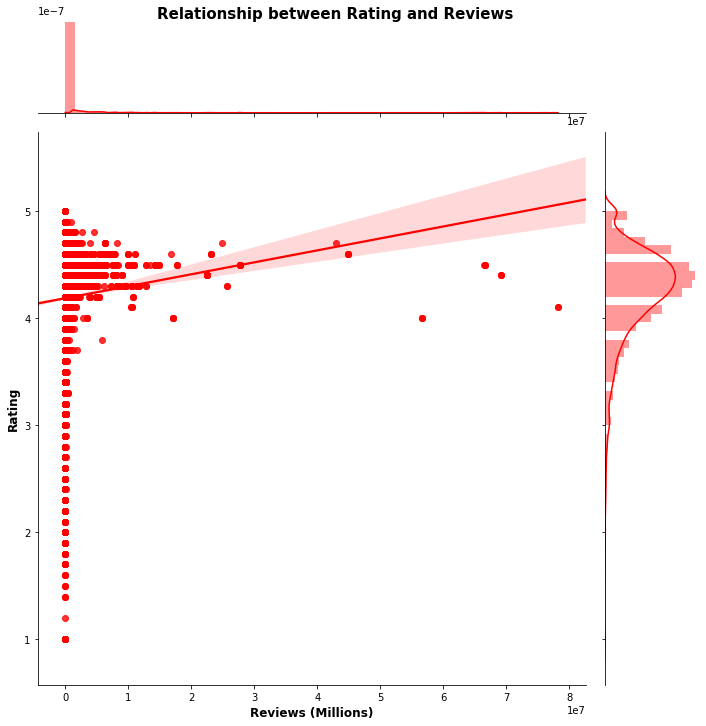

In [14]:
# Let's see the relationship between Rating and Reviews this time
# Will use seaborn.jointplot() to draw a plot of two variables with bivariate and univariate graphs

g = sns.jointplot(x='Reviews', y='Rating', color='red', data=df, size=10, kind='reg')
g.ax_joint.set_xlabel('Reviews (Millions)', fontsize=12, fontweight='bold')
g.ax_joint.set_ylabel('Rating', fontsize=12, fontweight='bold')

# Access the Figure
fig = g.fig

# Set a title
fig.suptitle('Relationship between Rating and Reviews', fontsize=15, fontweight='bold', position=(0.48, 1))

plt.show()

__Result:__ It seems like the more reviews, the higher rating - meaning __well-known apps tend to get a high rating.__

### Percent of Free apps in Google Play store

In [15]:
# See how many free and paid apps are registered in Google Play Store
df['Type'].value_counts()

Free    8715
Paid     645
Name: Type, dtype: int64

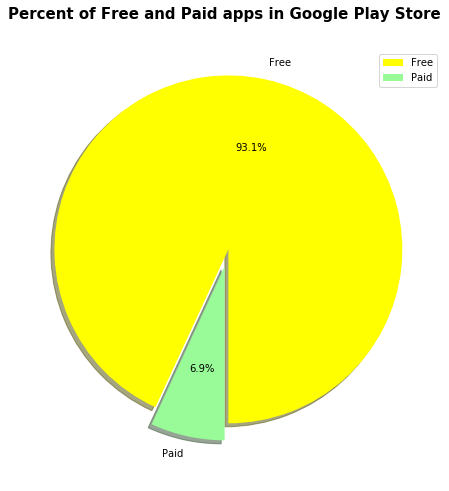

In [16]:
plt.figure(figsize=(8,8))

# Pie Plot
values = df['Type'].value_counts()
labels = df['Type'].value_counts().index

colors = ['yellow', 'palegreen']

plt.pie(values, labels=labels, colors=colors, explode=(0.1, 0), autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percent of Free and Paid apps in Google Play Store', fontsize=15, fontweight='bold', pad=30)
plt.legend(labels, loc='upper right')

plt.show()

__Result:__ Free apps take 93.1% in Google Play store

### Relationship between Rating and Price

In [17]:
# Let's see how does relationship between Rating and Price looks like - the apps that has less than 1M reviews
# Before doing that, the datatype of Price is still object. Let's convert it to float

df.Price = df.Price.apply(lambda x: x.replace('$',''))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Price'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

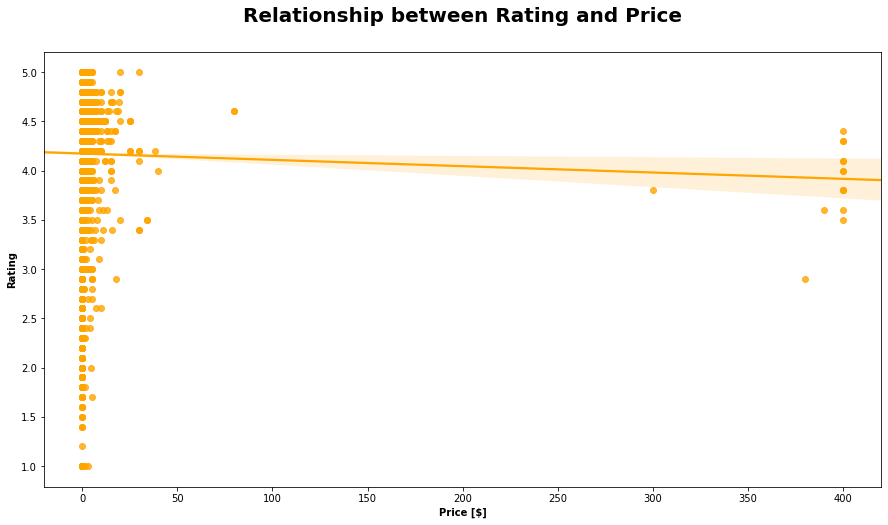

In [29]:
# Use Regression model for scateer plots in Seaborn - seaborn.regplot()
plt.figure(figsize=(15,8))

ax = sns.regplot(x='Price', y='Rating', data=df[df['Reviews'] < 1000000], color='orange')

ax.set_title('Relationship between Rating and Price', fontsize=20, fontweight='bold', pad=30)
ax.set_xlabel('Price [$]', fontweight='bold')
ax.set_ylabel('Rating', fontweight='bold')

plt.show()

__Result:__ The more expensive is the app, the lower is rating -  Meaning users tend to give lower rating to expensive apps